In [46]:
#This notebook demonstrates the accuracy of in-built classifiers from scikit learn's library with regards to
#(a) Various synthetic dataset
#(b) Performance on the generated data with the addition of noise and noise dimensions

In [47]:
#The classifiers that will be tested are
# 1.Random forest
# 2.SVM
# 3.KNN

In [48]:
#We start with the make_blobs function to generate a simple synthetic dataset 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Parameter - set number of samples = 100, features(dimensions) = 2, number of classes = 3, number of clusters = 3
samps = 500
feats = 2
from sklearn.datasets import make_blobs
Input_data = make_blobs(n_samples=samps, n_features=feats, centers=3, cluster_std=1.6, 
                   center_box=(-5.0, 5.0), shuffle=False, random_state=1)

In [49]:
#Store the input data and the associated labels to a variable
X = Input_data[0]
Y = Input_data[1]
print("Dimensions of the original data is", X.shape)

Dimensions of the original data is (500, 2)


In [50]:
#Split data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [51]:
print("Train data size is", X_train.shape)
print("Test data size is", X_test.shape)

Train data size is (375, 2)
Test data size is (125, 2)


In [52]:
#Create a pandas data frame for the input data 
X_df = pd.DataFrame(X, columns=['dim'+ str(i) for i in range(1,feats+1)])
X_df['y'] = Y

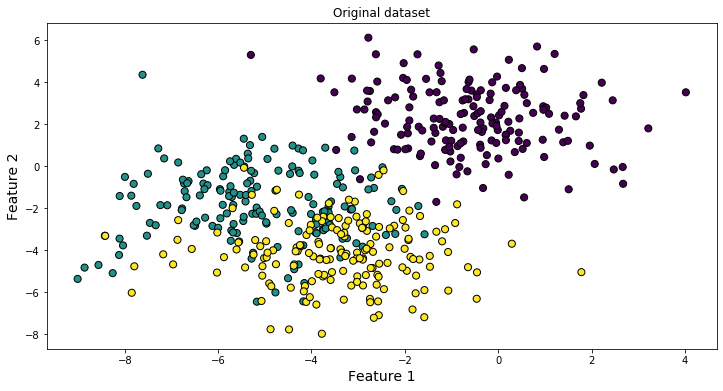

In [53]:
#Plot of the input data 
plt.figure(figsize=(12,6))   #initialise the size of the fig
#Plot the first two dimensions

plt.scatter(X_df['dim1'], X_df['dim2'], s=50, c=X_df['y'], edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset")
plt.show()

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [55]:
#Definition of the classifiers to be used 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

names = ["SVM", "Random Forest", "KNN" ]
Models = [svm.SVC(kernel='linear'), RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt'),KNeighborsClassifier(n_neighbors=3) ]


In [56]:
def compute_accuracy(test_data,test_label,c):
    pred = c.predict(test_data)
    pred_accu = accuracy_score(test_label,pred)
    return pred_accu;

def compute_confusion_matrix(test_f,test_l,c):
    pred = c.predict(test_f)
    x = confusion_matrix(test_l,pred)
    return x;

In [57]:
# Model the data based on the classifers
def fit_predict(train_data, train_label, test_data, test_label):
    accuracies = []
    for name, model in zip(names, Models):
        model.fit(train_data, train_label)
        score = model.score(test_data, test_label)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]
#     print("Accuracy for SVM", accuracies[0])
#     print("Accuracy for RF", accuracies[1])
#     print("Accuracy for KNN", accuracies[2])
    return SVM_acc,RF_acc,KNN_acc
    

In [58]:
#Function to display the accuracies for all three classifiers
l_acc,m_acc,p_acc =fit_predict(X_train, y_train, X_test, y_test)
print("Accuracy for SVM", l_acc)
print("Accuracy for RF", m_acc)
print("Accuracy for KNN", p_acc)

Accuracy for SVM 0.824
Accuracy for RF 0.8
Accuracy for KNN 0.832


In [59]:
#Define various levels of noise dimensions
#noise dimensions to try n = 4,6,10,20,100,500,1000,1500
n_dim = X.shape[0]
m_dim = [4, 6, 10, 20, 100, 500, 1000, 1500]
mu = []
sigma = []
gauss_noise = []
for k in range(9):
    mu.append(k*2)
    sigma.append(k*100)
    
for i in range(len(m_dim)):

    gauss_noise.append(np.random.normal(mu[i], sigma[i], size = [n_dim, m_dim[i]]))


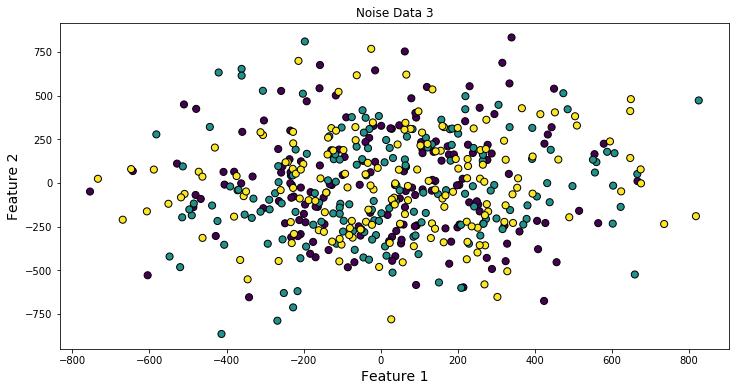

In [62]:
#Create a pandas data frame for the noise data 
f = gauss_noise[3].shape[1]
noise_df = pd.DataFrame(gauss_noise[3], columns=['dim'+ str(i) for i in range(1,f+1)])
noise_df['y'] = Y
#Plot of the noise data 
plt.figure(figsize=(12,6))   #initialise the size of the fig
#Plot the first two dimensions
plt.scatter(noise_df['dim1'], noise_df['dim2'], s=50, c=X_df['y'], edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Noise Data 3")
plt.show()

In [63]:
#concatenate all the noise dimensions to the original data
X_noise_dims = []
for j in range(len(m_dim)):
    print(j)
    #print(gauss_noise[j].shape)
    X_noise_dims.append(np.concatenate([X, gauss_noise[j]], axis = 1))
    print(X_noise_dims[j].shape)    

0
(500, 6)
1
(500, 8)
2
(500, 12)
3
(500, 22)
4
(500, 102)
5
(500, 502)
6
(500, 1002)
7
(500, 1502)


In [64]:
X_train_noise = [] 
X_test_noise = [] 
y_train_noise = []
y_test_noise = []
for z in range(len(m_dim)):
    X_tr1_n1, X_te1_n1, y_tr1_n1, y_te1_n1 = train_test_split(X_noise_dims[z], Y, test_size=0.25, random_state=1)
    #print(X_noise_dims[z].shape)
    X_train_noise.append(X_tr1_n1)
    X_test_noise.append(X_te1_n1)
    y_train_noise.append(y_tr1_n1)
    y_test_noise.append(y_te1_n1)


In [65]:
print(X_train_noise[5].shape)
print(X_test_noise[5].shape)

(375, 502)
(125, 502)


In [66]:
accuracy_SVM = []
accuracy_RF = []
accuracy_KNN = []

for d in range(len(m_dim)):
    acc1,acc2,acc3 =fit_predict(X_train_noise[d], y_train_noise[d], X_test_noise[d], y_test_noise[d])
    accuracy_SVM.append(acc1)
    accuracy_RF.append(acc2)
    accuracy_KNN.append(acc3)


In [21]:
#Splitting the for loops because it took too much time to execute 
# for f in range(2,4):
#     acc5,acc6,acc7 =fit_predict(X_train_noise[f], y_train_noise[f], X_test_noise[f], y_test_noise[f])
#     accuracy_SVM.append(acc5)
#     accuracy_RF.append(acc6)
#     accuracy_KNN.append(acc7)

In [23]:
# for f in range(4,6):
#     acc_svm1,acc_rf1,acc_knn1 =fit_predict(X_train_noise[f], y_train_noise[f], X_test_noise[f], y_test_noise[f])
#     accuracy_SVM.append(acc_svm1)
#     accuracy_RF.append(acc_rf1)
#     accuracy_KNN.append(acc_knn1)

In [25]:
# for f in range(6,8):
#     acc_svm2,acc_rf2,acc_knn2 =fit_predict(X_train_noise[f], y_train_noise[f], X_test_noise[f], y_test_noise[f])
#     accuracy_SVM.append(acc_svm2)
#     accuracy_RF.append(acc_rf2)
#     accuracy_KNN.append(acc_knn2)

In [73]:
print(accuracy_SVM)
print(accuracy_RF)
print(accuracy_KNN)

[0.824, 0.824, 0.8, 0.84, 0.784, 0.648, 0.32, 0.256, 0.304]
[0.808, 0.808, 0.816, 0.792, 0.824, 0.728, 0.656, 0.488, 0.552]
[0.832, 0.832, 0.32, 0.352, 0.36, 0.312, 0.336, 0.36, 0.288]


In [72]:
accuracy_SVM[:0] = [0.824]
accuracy_RF[:0] = [0.808]
accuracy_KNN[:0] = [0.832]
print(noise_dim)

[0, 0, 4, 6, 10, 20, 100, 500, 1000, 1500]


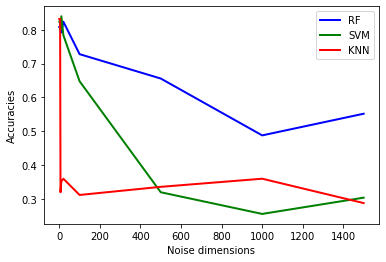

In [77]:
noise_dim = [0, 4, 6, 10, 20, 100, 500, 1000, 1500]

df=pd.DataFrame({'dimensions': noise_dim, 'RF': accuracy_RF, 'SVM': accuracy_SVM, 'KNN': accuracy_KNN })
plt.plot( 'dimensions', 'RF', data=df, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=2)
plt.plot( 'dimensions', 'SVM', data=df, marker='', color='green', linewidth=2)
plt.plot( 'dimensions', 'KNN', data=df, marker='', color='red', linewidth=2, label="KNN")
plt.xlabel('Noise dimensions')
plt.ylabel('Accuracies')

plt.legend()
